# task2

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings("ignore")

## task2.1

In [118]:
data2_1_file = 'result1_1.xlsx'
data2_1_M101 = pd.read_excel(data2_1_file, sheet_name='M101')
data2_1_M102 = pd.read_excel(data2_1_file, sheet_name='M102')
print("M101数据概览：\n", data2_1_M101.head(2))
print("M102数据概览：\n", data2_1_M102.head(2))

monthly_total_M101 = data2_1_M101.groupby('月份')['产品总数（件）'].sum()
monthly_total_M102 = data2_1_M102.groupby('月份')['产品总数（件）'].sum()
monthly_total = pd.DataFrame({
    'M101': monthly_total_M101,
    'M102': monthly_total_M102
    })
print("每个月的产品总数：\n", monthly_total)

M101数据概览：
    月份  日期  产品总数（件）  合格产品数（件）  不合格产品数（件）     合格率（%）
0   1   1     3462      3453          9  99.740035
1   1   2     3252      3245          7  99.784748
M102数据概览：
    月份  日期  产品总数（件）  合格产品数（件）  不合格产品数（件）     合格率（%）
0   1   1     3519      3518          1  99.971583
1   1   2     3319      3318          1  99.969870
每个月的产品总数：
       M101    M102
月份                
1   105137  106186
2    92487   97129
3    99049   97603
4    95772   94236
5    99052   97526
6    93133   91032
7    96100   95893
8    95035   95868
9    99327   99810
10  102104  103993
11   99373   99207
12  106447  108355


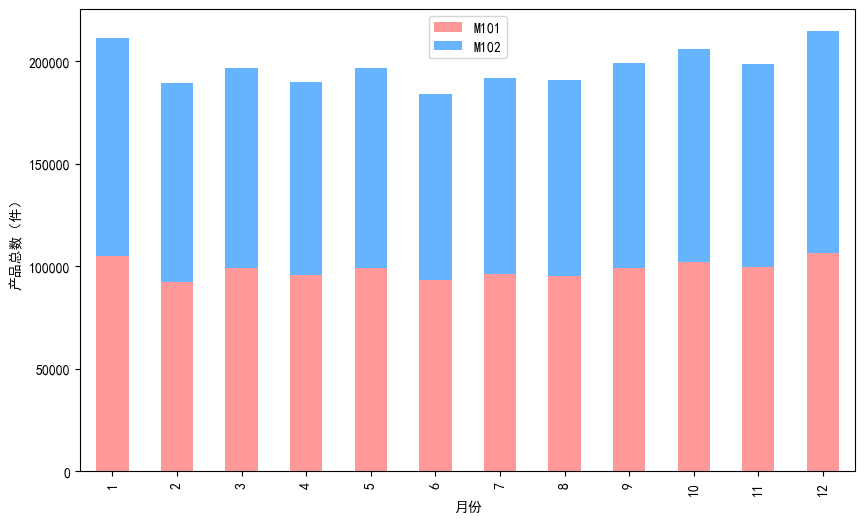

In [119]:
monthly_total.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#FF9999', '#66B3FF'])
# plt.title('M101和M102每月产品总数堆叠柱状图')
plt.xlabel('月份')
plt.ylabel('产品总数（件）')

plt.show()

## task2.2

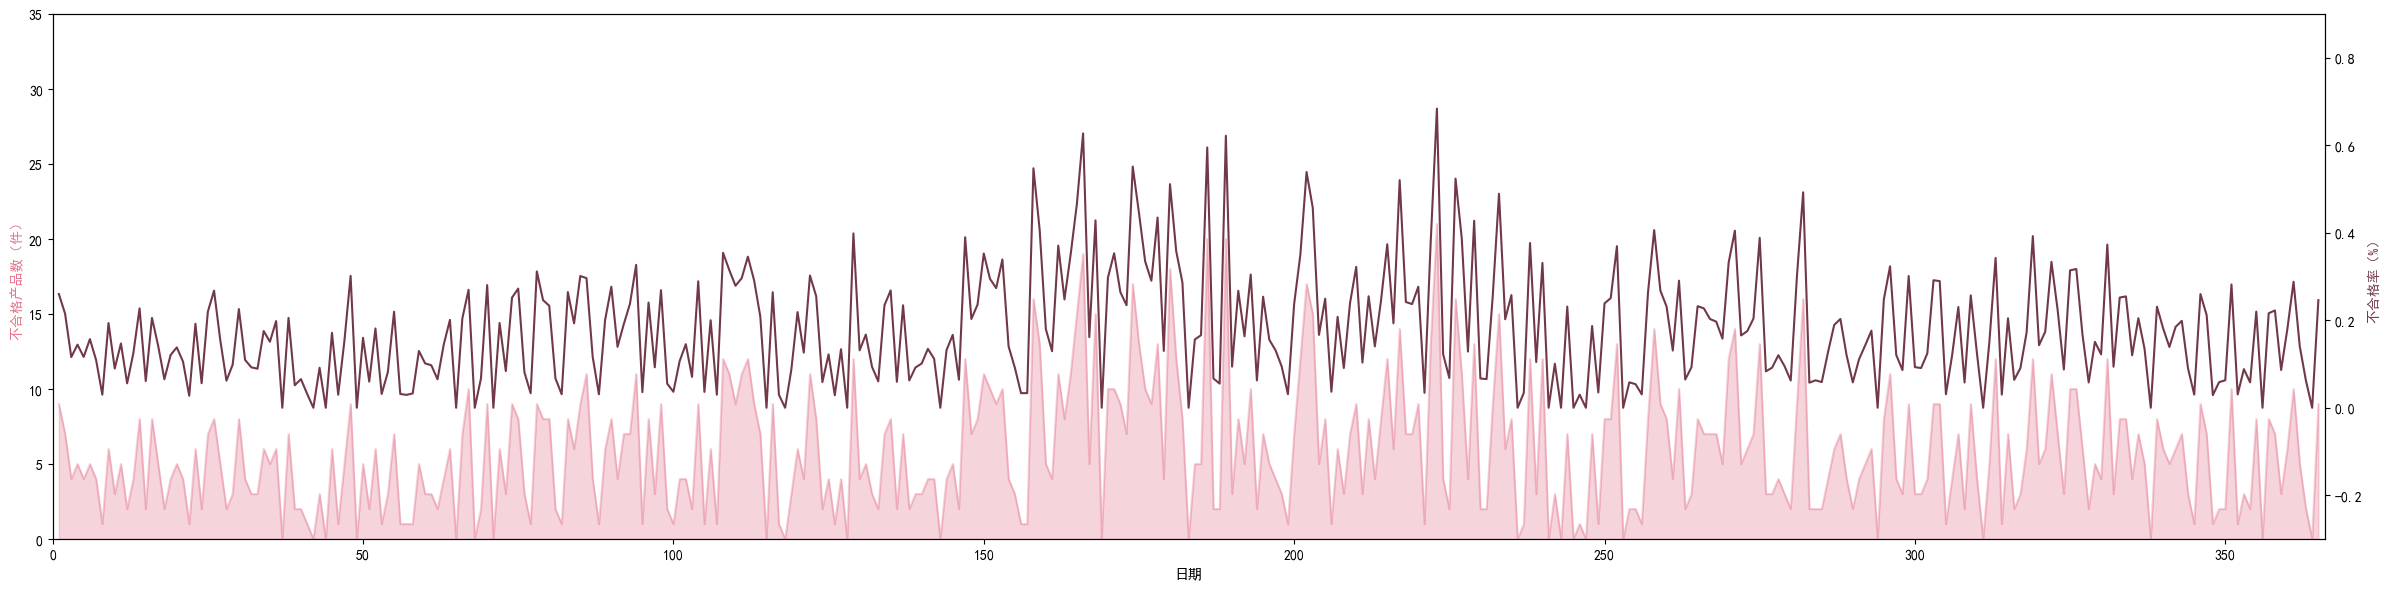

In [120]:
fig, ax1 = plt.subplots(figsize=(24, 6))

# 绘制不合格产品数的折线图 (左Y轴)
ax1.set_xlabel('日期')
ax1.set_ylabel('不合格产品数（件）', color='#e3738b')
ax1.set_ylim(0, 35)
ax1.set_xlim(0, 366)
ax1.plot(range(366)[1:], data2_1_M101['不合格产品数（件）'], color='#e3738b', alpha=0.3, label='不合格产品数（件）')
ax1.fill_between(range(366)[1:], data2_1_M101['不合格产品数（件）'], color='#e3738b', alpha=0.3)
ax1.tick_params(axis='y', labelcolor='black')

# 创建不合格率右侧Y轴
ax2 = ax1.twinx()
ax2.set_ylabel('不合格率（%）', color='#713948')
ax2.set_ylim(-0.3, 0.9)
ax2.plot(range(366)[1:], 100-data2_1_M101['合格率（%）'], color='#713948', label='不合格率（%）')
ax2.tick_params(axis='y', labelcolor='black')

# plt.title('M101生产线每日不合格产品数与不合格率')
plt.tight_layout()
plt.show()


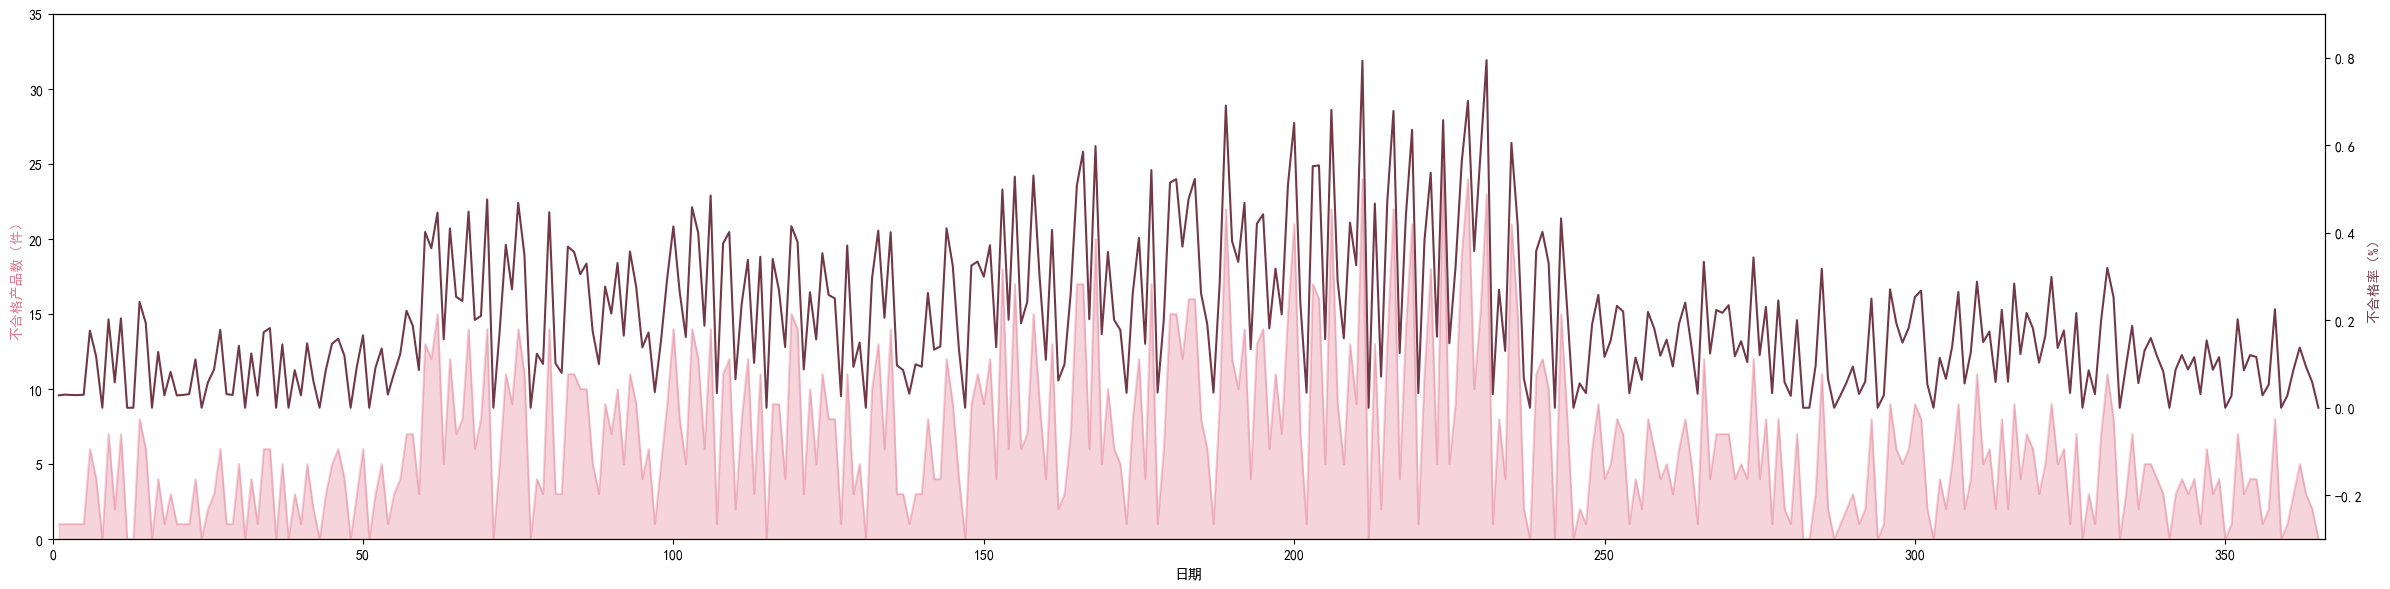

In [121]:
fig, ax1 = plt.subplots(figsize=(24, 6))

# 绘制不合格产品数的折线图 (左Y轴)
ax1.set_xlabel('日期')
ax1.set_ylabel('不合格产品数（件）', color='#e3738b')
ax1.set_ylim(0, 35)
ax1.set_xlim(0, 366)
ax1.plot(range(366)[1:], data2_1_M102['不合格产品数（件）'], color='#e3738b', alpha=0.3, label='不合格产品数（件）')
ax1.fill_between(range(366)[1:], data2_1_M102['不合格产品数（件）'], color='#e3738b', alpha=0.3)
ax1.tick_params(axis='y', labelcolor='black')

# 创建不合格率右侧Y轴
ax2 = ax1.twinx()
ax2.set_ylabel('不合格率（%）', color='#713948')
ax2.set_ylim(-0.3, 0.9)
ax2.plot(range(366)[1:], 100-data2_1_M102['合格率（%）'], color='#713948', label='不合格率（%）')
ax2.tick_params(axis='y', labelcolor='black')

# 添加标题
# plt.title('M102生产线每日不合格产品数与不合格率')

# 显示图形
plt.tight_layout()
plt.show()


## task2.3

In [122]:
data2_3_file = 'result1_3.xlsx'
data2_3 = pd.read_excel(data2_3_file)
data2_3_M101 = data2_3[data2_3['生产线'] == 'M101']
data2_3_M102 = data2_3[data2_3['生产线'] == 'M102']
year_total_M101 = data2_3_M101.groupby('故障类别')['总次数'].sum()
year_total_M102 = data2_3_M102.groupby('故障类别')['总次数'].sum()
print(f'M101总共故障{year_total_M101.sum()}次',year_total_M101)
print(f'M102总共故障{year_total_M102.sum()}次',year_total_M102)

M101总共故障3720次 故障类别
A1     240
A2    2335
A3     319
A4     826
Name: 总次数, dtype: int64
M102总共故障3650次 故障类别
A1     217
A2    2263
A3     318
A4     852
Name: 总次数, dtype: int64


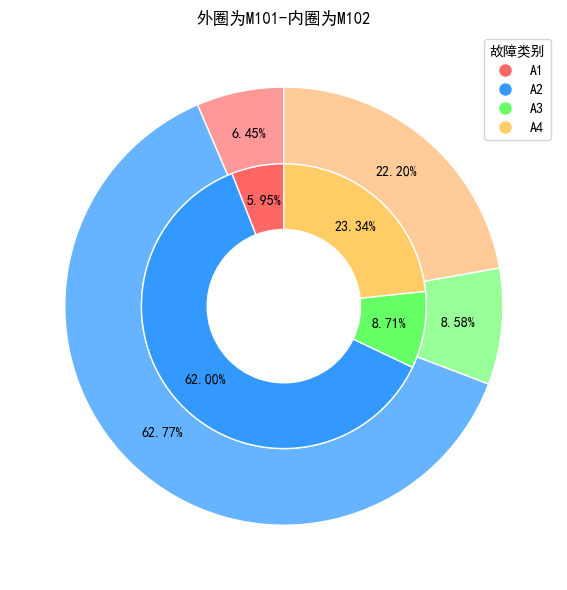

In [123]:
category = ['A1', 'A2', 'A3', 'A4']
colors1 = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']
colors2 = ['#FF6666', '#3399FF', '#66FF66', '#FFCC66']

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(year_total_M101, labels=None, autopct='%1.2f%%', startangle=90, 
       wedgeprops={'width': 0.35, 'edgecolor': 'white'}, colors=colors1, radius=1, pctdistance=0.8)
ax.pie(year_total_M102, labels=None, autopct='%1.2f%%', startangle=90, 
       wedgeprops={'width': 0.3, 'edgecolor': 'white'}, colors=colors2, radius=0.65, pctdistance=0.75)

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors2[i], markersize=10) for i in range(len(category))]
ax.legend(handles, category, title="故障类别", loc="upper right")

# 设置标题
# plt.title('故障类别占比 - 双层环形图')
plt.title('外圈为M101-内圈为M102')

# 显示图形
plt.tight_layout()
plt.show()

## task2.4

In [124]:
data2_4_file = 'result1_2.xlsx'
data2_4_M101 = pd.read_excel(data2_4_file, sheet_name='M101')
data2_4_M102 = pd.read_excel(data2_4_file, sheet_name='M102')

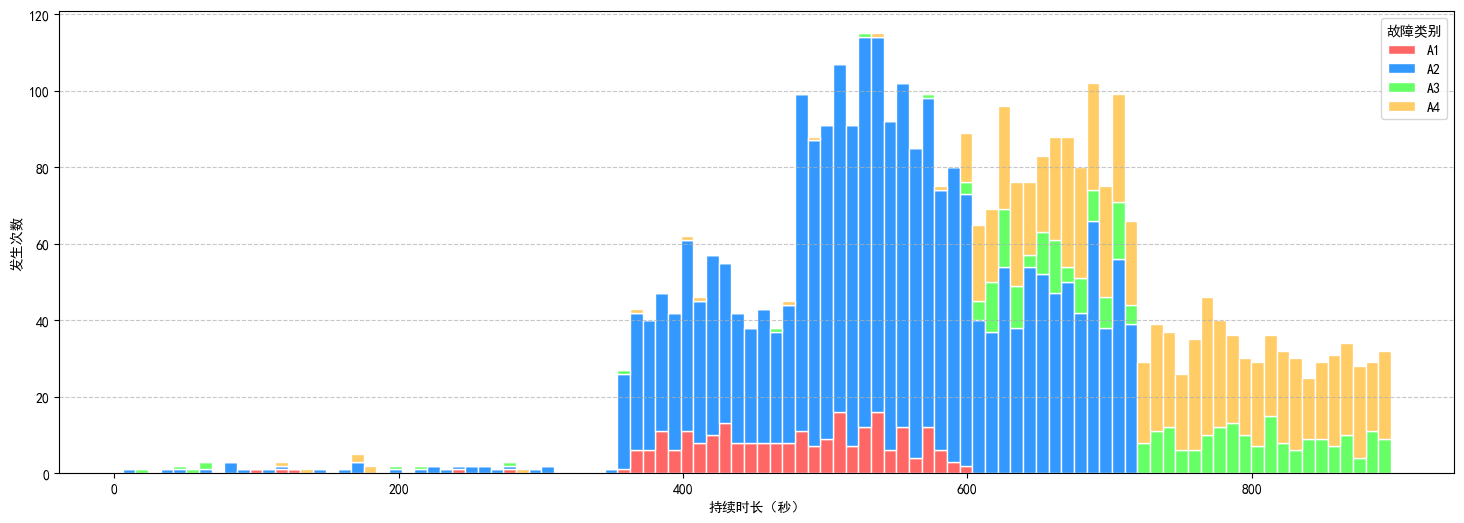

In [125]:
bin_count = 100
category = ['A1', 'A2', 'A3', 'A4']
colors2 = ['#FF6666', '#3399FF', '#66FF66', '#FFCC66']

plt.figure(figsize=(18, 6))
plt.hist([data2_4_M101[data2_4_M101["故障类别"] == cat]["持续时长（秒）"] for cat in category], 
         bins=bin_count, stacked=True, edgecolor="white", color=colors2, label=category)

plt.xlabel("持续时长（秒）")
plt.ylabel("发生次数")
plt.legend(title="故障类别")
# plt.title("全年故障发生的持续时长叠加直方图")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## task2.5

In [126]:
data2_5 = pd.read_csv('附件1\M101.csv', encoding='gbk')
data2_5 = data2_5[(data2_5['月份'] == 4) & (data2_5['日期'] == 26) & (data2_5['时间'] <= 100)]
print(data2_5)

         月份  日期   时间 故障类别  推出状态  推出累计数  抓取状态  抓取累计数  安装状态  安装累计数  检测状态  检测累计数  \
3311885   4  26    1  NaN     1      1     0      0     0      0     0      0   
3311886   4  26    2  NaN     0      1     0      0     0      0     0      0   
3311887   4  26    3  NaN     0      1     0      0     0      0     0      0   
3311888   4  26    4  NaN     1      2     0      0     0      0     0      0   
3311889   4  26    5  NaN     0      2     0      0     0      0     0      0   
...      ..  ..  ...  ...   ...    ...   ...    ...   ...    ...   ...    ...   
3311980   4  26   96   A1    -1     15     0     12     1     11     0      8   
3311981   4  26   97   A1    -1     15     0     12     1     11     0      8   
3311982   4  26   98   A1    -1     15     0     12     1     11     0      8   
3311983   4  26   99   A1    -1     15     0     12     1     11     0      8   
3311984   4  26  100   A1    -1     15     0     12     1     11     0      8   

         合格产品累计数  不合格产品累计数 

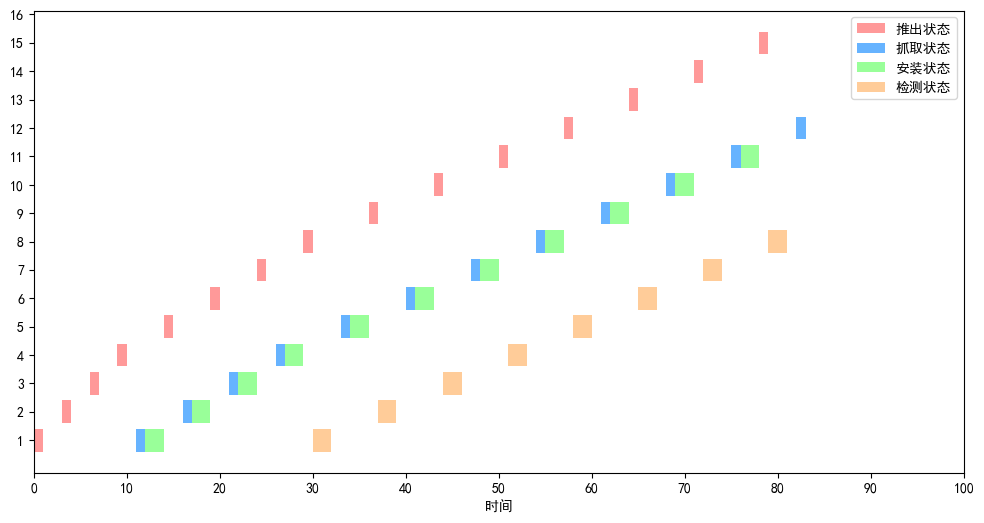

In [127]:
data2_5.to_csv('output.csv', index=False)
tasks = ['推出状态', '抓取状态', '安装状态', '检测状态']

fig, ax = plt.subplots(figsize=(12, 6))
y_pos = range(len(tasks))
for idx, task in enumerate(tasks):

    end_time = 0
    start_time = 0
    task_data = data2_5[['时间', task]]
    num = 1

    for i in range(len(task_data)-1):
        if (task_data.iloc[i, 1] == 1) and (task_data.iloc[i+1, 1] == 0):
            end_time = i+1
        elif (task_data.iloc[i, 1] == 0) and (task_data.iloc[i+1, 1] == 1):
            start_time = i+1
        
        if start_time < end_time:
            if num == 1:
                ax.barh(y=num, width=end_time - start_time, left=start_time, color=colors1[idx], label=task)
            else:
                ax.barh(y=num, width=end_time - start_time, left=start_time, color=colors1[idx])
            num = num + 1
            start_time = end_time


# 格式设置
ax.set_yticks(range(17)[1:])
ax.set_xticks(range(0, 110, 10))
ax.set_xlabel("时间")
# ax.set_ylabel("任务")
# ax.set_title("任务甘特图")
plt.legend()
plt.show()
